In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass

from dataframe import EnhancedDataframe


    



In [3]:
spx = EnhancedDataframe.populate_dataframe(yf.download("^GSPC", period='2y', interval='1d'), "SPX")

[*********************100%***********************]  1 of 1 completed


In [4]:
columns = ("Open", "HIgh", "Low", "Close", "Volume", "RSI", 'STOCH_K', "BB_lower", "BB_middle", "BB_upper", "MACD_histogram", "MA20", "MA50")
spx = spx.drop([col for col in spx.columns if not col in columns], axis=1)

6.419753086419753


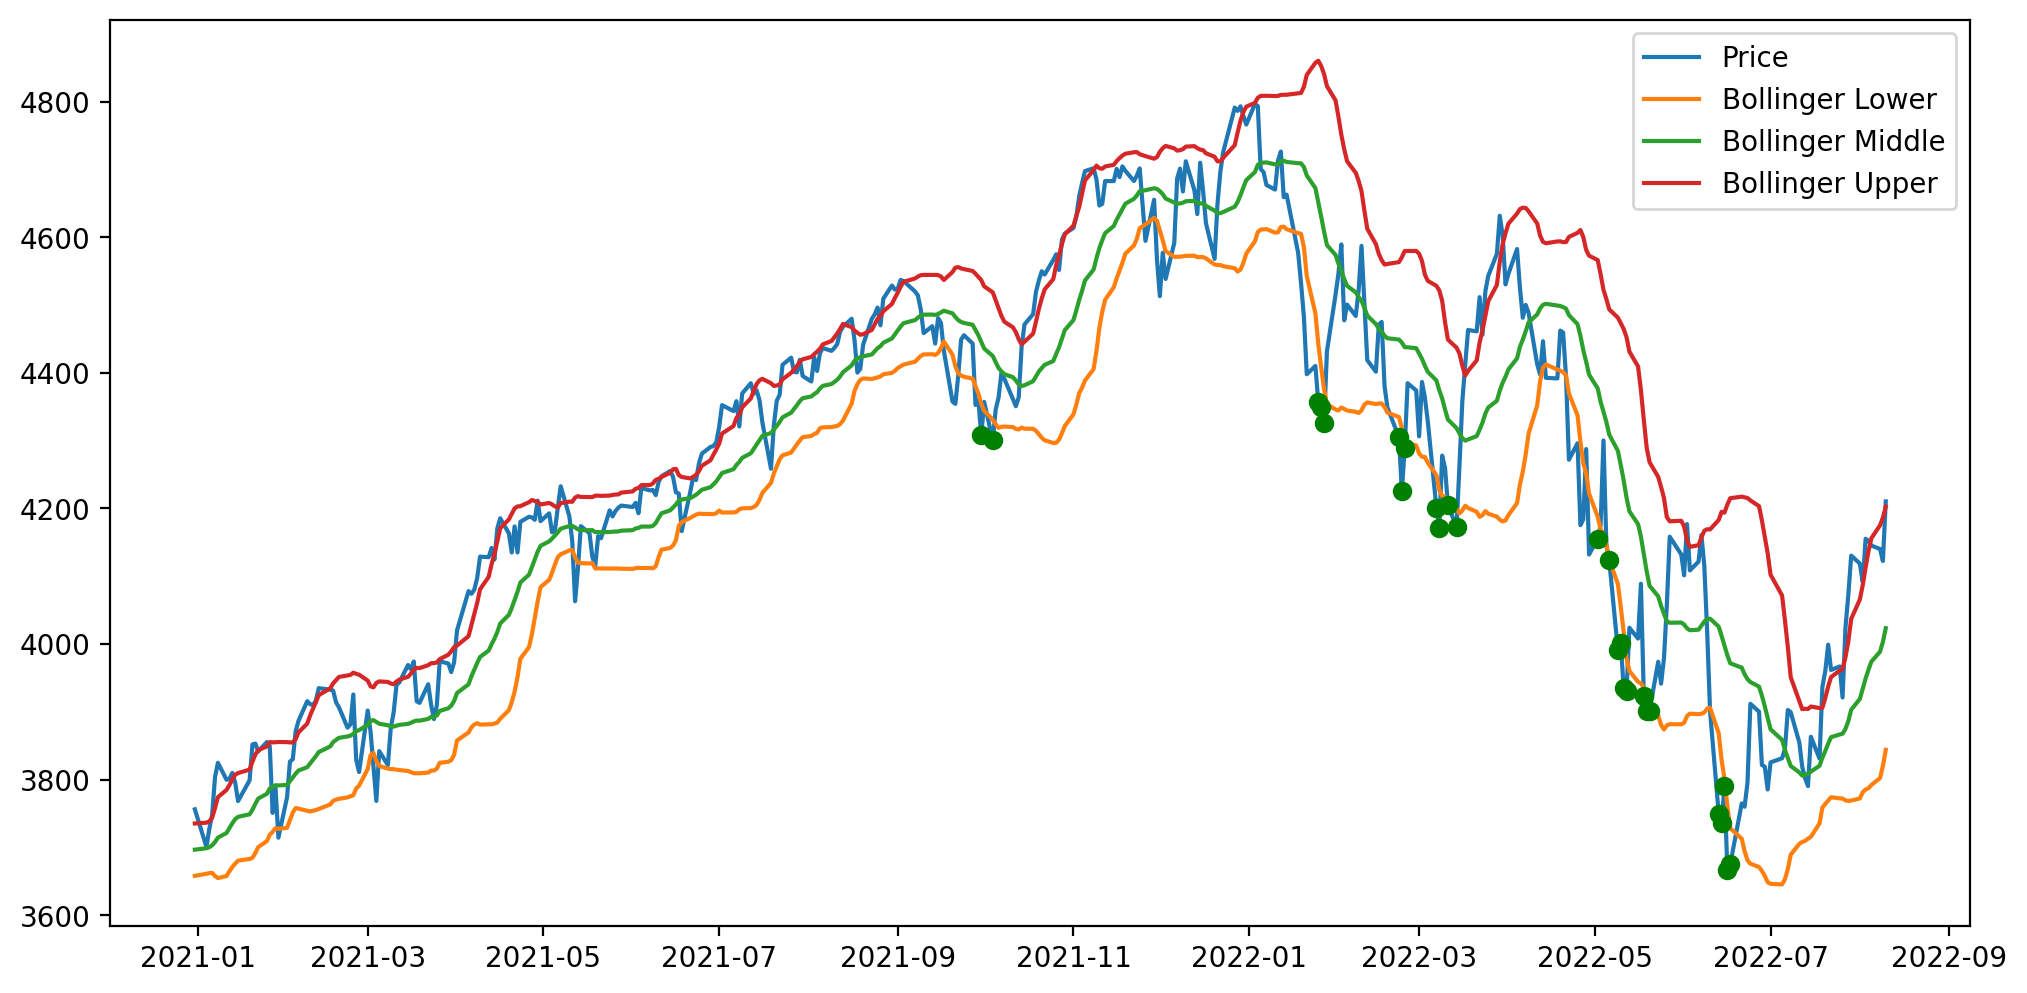

In [8]:
plt.figure(figsize=(12, 6), dpi=200)

plt.plot(spx.index, spx['Close'], label='Price')
plt.plot(spx.index, spx['BB_lower'], label='Bollinger Lower')
plt.plot(spx.index, spx["BB_middle"], label='Bollinger Middle')
plt.plot(spx.index, spx['BB_upper'], label='Bollinger Upper')
entries = spx[ (spx['MACD_histogram'] < -1.5) & (spx['RSI'] < 45) & (spx['MA20'] < spx["MA50"]) & (spx['Close'] < spx['BB_lower'])]


for i, date in enumerate(entries.index):
        plt.plot(spx.loc[date].name, spx.loc[date]['Close'], marker='o', c='g')

plt.legend()

print(len(entries) / len(spx) * 100)

In [9]:
entries

,Open,Low,Close,Volume,MA20,MA50,RSI,MACD_histogram,BB_lower,BB_middle,BB_upper,STOCH_K
Date,,,,,,,,,,,,
2021-09-30,4370.669922,4306.240234,4307.540039,3123770000,4441.615991,4443.234795,34.177839,-14.929001,4354.434468,4445.567187,4536.699907,0.871222
2021-10-04,4348.839844,4278.939941,4300.459961,3110560000,4420.871973,4440.799395,36.602436,-14.762966,4330.801226,4424.734172,4518.667117,10.349638
2022-01-25,4366.640137,4287.109863,4356.450195,3989420000,4648.839478,4654.943604,25.808837,-40.846839,4442.425131,4651.380509,4860.335888,23.271555
2022-01-26,4408.430176,4304.799805,4349.930176,4046270000,4627.018481,4648.285205,25.488481,-40.333333,4407.996036,4630.289673,4852.583310,24.193776
2022-01-27,4380.580078,4309.500000,4326.509766,4074330000,4603.690967,4641.159404,24.320675,-39.032112,4376.199271,4608.448836,4840.698401,19.743003
2022-02-22,4332.740234,4267.109863,4304.759766,4007780000,4449.556470,4581.129980,35.853115,-11.148958,4334.760683,4449.016659,4563.272634,11.471627
2022-02-23,4324.930176,4221.509766,4225.500000,3814340000,4443.008960,4571.399580,31.841520,-18.455641,4318.724098,4444.582487,4570.440876,1.082773
2022-02-24,4155.770020,4114.649902,4288.700195,5070560000,4439.947461,4563.794180,37.816239,-17.599003,4295.803997,4437.751156,4579.698314,36.612886
2022-03-07,4327.009766,4199.850098,4201.089844,5506330000,4387.799487,4519.749775,36.352374,-4.452191,4249.213556,4388.735986,4528.258417,23.056806


In [39]:
import warnings
warnings.filterwarnings('ignore')

accuracies = []
corrections = 0
negative_reutnrs = 0


def get_log_return(last_price: float, entry_price: float) -> float:
    return ((np.exp(np.log(last_price / entry_price))) - 1) * 100

def track_position_movements(sub_df: pd.DataFrame):
    sub_df['log_rets'] = np.vectorize(get_log_return)(sub_df['Close'], sub_df['Close'].iloc[0])
    negative_returns = sub_df[sub_df['log_rets'] < 0]
    if len(negative_returns):
        negative_returns += 1
        for return_ in negative_returns.index:
            sub_sub_df = sub_df[negative_returns.loc[return_].name:]
            if len(sub_sub_df[sub_sub_df['log_rets'] > 0]):
                return True
        return False
                # print(f"Entry at: {negative_returns.loc[return_].name} went from negative to positive")
                
                # print(
                #     f"{negative_returns.loc[return_]['log_rets']:.2f} -> {sub_sub_df[sub_sub_df['log_rets'] > 0].iloc[0]['log_rets']:.2f}\n")






log_returns = []
entries_movements = []

for date in entries.index:
    sub_df = spx[spx.index.get_loc(date) : spx.index.get_loc(date) + 16]
    log_ret = (np.exp(np.log(sub_df['Close'].iloc[-1] / sub_df['Close'].iloc[0])) -1) * 100
    log_returns.append(log_ret)
    entries_movements.append(track_position_movements(sub_df))
accuracies.append(len(list(filter(lambda x: x > 0, log_returns))) / len(log_returns) * 100)

# Only account for entries that were negative at some point (function didn't return None)
entries_movements = list(filter(lambda entry: isinstance(entry, bool), entries_movements))

positive_correction_rate = (len(list(
    filter(lambda entry: entry, entries_movements))) / len(entries_movements)) * 100
positive_correction_rate

89.47368421052632

14

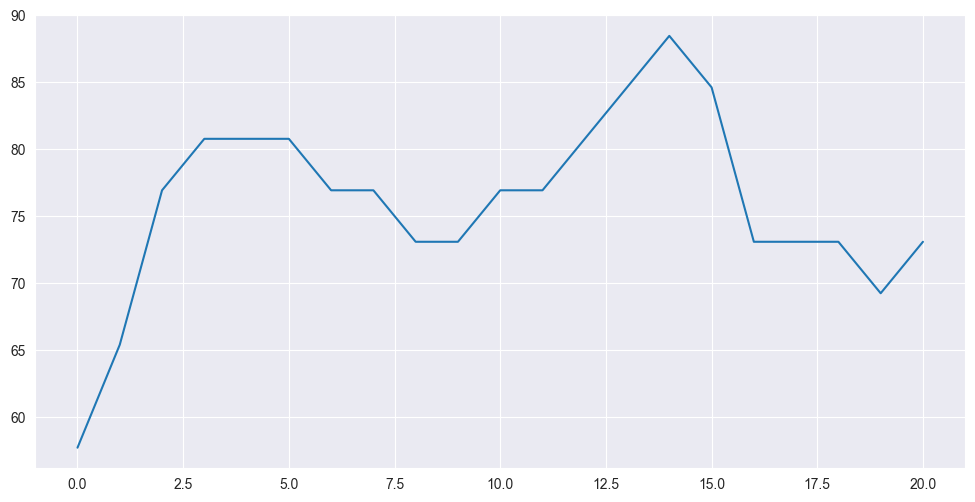

In [65]:
plt.figure(figsize=(12, 6),dpi=100)
plt.plot(range(len(accuracies)), accuracies)

# Justifies 13
accuracies.index(max(accuracies))

In [69]:
accuracy = len(list(filter(lambda x: x > 0, log_returns))) / len(log_returns) * 100
print(f"Accuracy: {accuracy:.2f}")

log_returns = np.array(log_returns)
print("Mean: ", log_returns.mean())
print("Volatility: ", log_returns.std())

Accuracy: 88.46
Mean:  3.543104405474746
Volatility:  3.6014022844213276


In [ ]:
# Results ()